In [2]:
import pandas as pd

# Daten einlesen
# Destatis_Wanderungsstatistik_12711-0005
url = "https://raw.githubusercontent.com/Antonijatzele/DSI_Abschlussprojekt/refs/heads/main/Daten/Destatis_Wanderungsstatistik_12711-0005_aufbereitet.csv"
df = pd.read_csv(url)

df.head()

,Jahr,Nationalität_Code,Nationalität,Geschlecht,Anzahl,Wanderung_Code,Wanderung_Label
0,2001,NATD,Deutsche,männlich,61592,BEV011,Fortzüge in das Ausland
1,2001,NATD,Deutsche,männlich,104695,BEV029,Zuzüge aus dem Ausland
2,2001,NATD,Deutsche,männlich,43103,BEV012,Wanderungssaldo Ausland
3,2018,NATD,Deutsche,weiblich,98762,BEV011,Fortzüge in das Ausland
4,2018,NATD,Deutsche,weiblich,77171,BEV029,Zuzüge aus dem Ausland


In [3]:
df.nunique()

Jahr                  24
Nationalität_Code      2
Nationalität           2
Geschlecht             2
Anzahl               288
Wanderung_Code         3
Wanderung_Label        3
dtype: int64

In [4]:
df.isnull().sum()

Jahr                 0
Nationalität_Code    0
Nationalität         0
Geschlecht           0
Anzahl               0
Wanderung_Code       0
Wanderung_Label      0
dtype: int64

In [7]:
# df.describe()

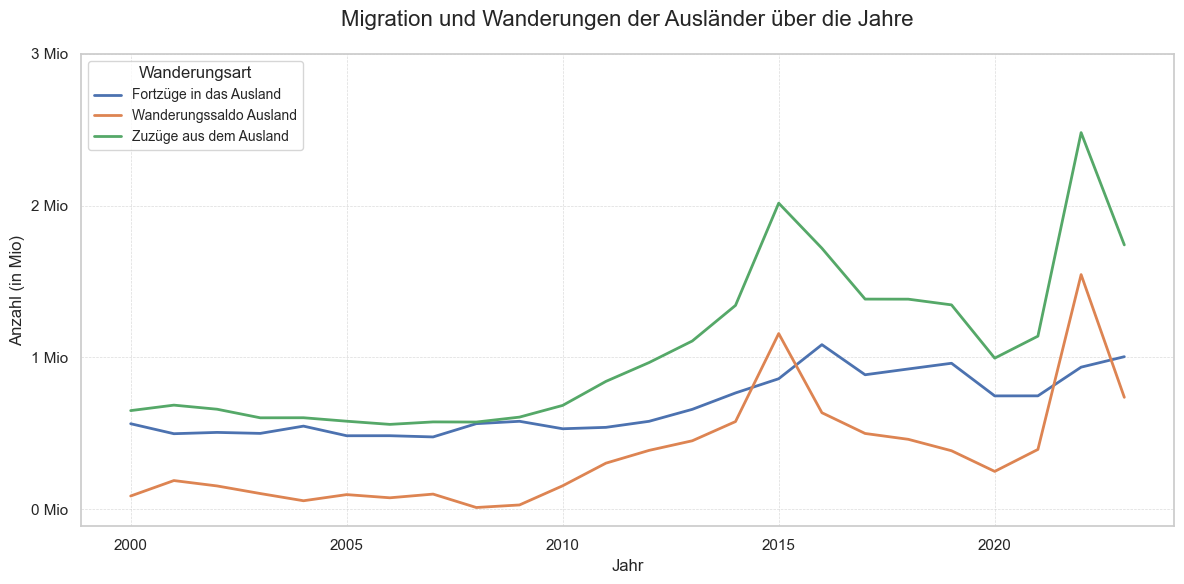

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Seaborn-Stil verwenden
sns.set(style="whitegrid")

# Nur Ausländer-Daten
df_auslaender = df[df["Nationalität"] != "Deutsche"]

# Pivot-Tabelle: Jahre als Index, Wanderungsarten als Spalten
df_auslaender_pivot = df_auslaender.pivot_table(
    values="Anzahl",
    index="Jahr",
    columns="Wanderung_Label",
    aggfunc="sum"
)

# Plot-Größe und Stil
plt.figure(figsize=(12, 6))
ax = df_auslaender_pivot.plot(ax=plt.gca(), linewidth=2)

# Titel und Achsenbeschriftungen
plt.title("Migration und Wanderungen der Ausländer über die Jahre", fontsize=16, pad=20)
ax.set_ylabel('Anzahl (in Mio)', fontsize=12)
ax.set_xlabel('Jahr', fontsize=12)

# Y-Achse formatieren: in Millionen mit "Mio"
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f} Mio"))

# Y-Ticks anpassen
max_y_value = df_auslaender_pivot.max().max() / 1e6
yticks = range(0, int(max_y_value) + 2)
ax.set_yticks([tick * 1e6 for tick in yticks])

# Legende optimieren
ax.legend(title='Wanderungsart', title_fontsize=12, fontsize=10, loc='upper left')

# Gitterlinien
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Layout anpassen
plt.tight_layout()
plt.show()

In [ ]:
'''
Gründe für den Anstieg 2015:
Flüchtlingskrise: Flüchtlinge insbesondere aus Ländern wie Syrien, Afghanistan und dem Irak.
Politische Entscheidung von Angela Merkel:
Im Sommer 2015 verkündete die damalige Bundeskanzlerin Angela Merkel die Entscheidung, dass Deutschland eine offene Tür für Flüchtlinge habe 
und viele Menschen aus dem Nahen Osten und Afrika aufnehmen würde, unabhängig von den europäischen Verteilmechanismen. 
Das führte zu einer massiven Steigerung der Zuzüge, da viele Migranten und Flüchtlinge nach Deutschland kamen, um Asyl zu beantragen.
'''

In [ ]:
'''
Gründe für den Anstieg 2022:
1. Russischer Angriff auf die Ukraine (Februar 2022)
2. Auch aus anderen Krisenregionen wie Afghanistan, dem Nahen Osten, Afrika und Südasien gab es weiterhin Flüchtlingsströme.
3. Wirtschaftliche Migration und Arbeitsmigration
Fachkräftemangel und Arbeitsmigration: Deutschland hat aufgrund des demografischen Wandels und des Fachkräftemangels verstärkt Arbeitskräfte aus dem Ausland gesucht.

'''